Analisis de los datasets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col, regexp_replace
from pyspark.sql.types import IntegerType

In [ ]:
df = spark.read.csv("/FileStore/tables/Datasets/NYPD_Arrest_Data__Year_to_Date__20240226.csv", header=True, inferSchema=True)



In [ ]:
df3 = spark.read.csv("/FileStore/tables/Datasets/Motor_Vehicle_Collisions_Vehicles.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- ARREST_DATE: date (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: integer (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- New Georeferenced Column: string (nullable = true)



In [ ]:
display(df.describe())

summary,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
count,226872,226870,226872,226855,226872,226872,225273,226872,226872,226872,226872,226872,226872,226872,226872,226872,226872,226872
mean,2.706479248400111E8,424.7544011989245,null,249.3451323532653,null,null,9.0,null,63.43052910892486,0.9285367960788462,null,null,null,1005786.7287192778,208289.0843206742,40.7381536574416,-73.92191484770285,null
stddev,5304010.298148577,274.4753806048603,null,147.68673264760508,null,null,0.0,null,34.635045257003966,7.538568508006557,null,null,null,21509.437648151856,29744.7188726473,0.1182365542455639,0.17333780170454163,null
min,261180920,1,(null),101,(null),(null),(null),B,1,0,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE,0,0,0.0,-74.253256,POINT (-73.70059684703173 40.7390218775969)
max,279779734,997,"WEAPONS,MFR,TRANSPORT,ETC.",995,VEHICLE AND TRAFFIC LAWS,VTL21300A5,V,S,123,97,<18,U,WHITE HISPANIC,1067220,271819,40.912714,0.0,POINT (0 0)


In [ ]:
df2.head()

Row(SERIALNO=1, SPORDER=1, PWGTP=95, WGTP=95, AGEP=31, CIT=1, REL=0, SCH=1, SCHG=0, SCHL=22, SEX=2, ESR=1, LANX=2, ENG=None, MSP=6, MAR=5, WKW=1, WKHP=60, DIS=2, JWTR=12, NP=1, TEN=2, HHT=6, AgeCateg=2, Boro=2, CitizenStatus=1, EducAttain=4, EST_Childcare=0.0, EST_Commuting=1722.0, EST_EITC=0.0, EST_FICAtax=9765.2422, EST_HEAP=0.0, EST_Housing=1478.3278, EST_IncomeTax=33580.543, EST_MOOP=2642.8, EST_Nutrition=0.0, EST_PovGap=0.0, EST_PovGapIndex=0.0, Ethnicity=4, FamType_PU=8, FTPTWork=1, INTP_adj=0.0, MRGP_adj=0.0, NYCgov_Income=81417.961, NYCgov_Pov_Stat=2, NYCgov_REL=0, NYCgov_Threshold=16241.6, Off_Pov_Stat=2, Off_Threshold=13064, OI_adj=0.0, PA_adj=0.0, Povunit_ID=1, Povunit_Rel=1, PreTaxIncome_PU=127650.22, RETP_adj=0.0, RNTP_adj=0.0, SEMP_adj=0.0, SSIP_adj=0.0, SSP_adj=0.0, TotalWorkHrs_PU=2, WAGP_adj=127650.22)

In [ ]:
df3.select("CONTRIBUTING_FACTOR_1").head(10)

[Row(CONTRIBUTING_FACTOR_1='Unspecified'),
 Row(CONTRIBUTING_FACTOR_1='Driver Inattention/Distraction'),
 Row(CONTRIBUTING_FACTOR_1='Driver Inattention/Distraction'),
 Row(CONTRIBUTING_FACTOR_1='Unspecified'),
 Row(CONTRIBUTING_FACTOR_1='Other Vehicular'),
 Row(CONTRIBUTING_FACTOR_1='Driver Inattention/Distraction'),
 Row(CONTRIBUTING_FACTOR_1='Unspecified'),
 Row(CONTRIBUTING_FACTOR_1='Driver Inattention/Distraction'),
 Row(CONTRIBUTING_FACTOR_1='Unspecified'),
 Row(CONTRIBUTING_FACTOR_1='Driver Inattention/Distraction')]

In [ ]:
df2.printSchema()

root
 |-- SERIALNO: integer (nullable = true)
 |-- SPORDER: integer (nullable = true)
 |-- PWGTP: integer (nullable = true)
 |-- WGTP: integer (nullable = true)
 |-- AGEP: integer (nullable = true)
 |-- CIT: integer (nullable = true)
 |-- REL: integer (nullable = true)
 |-- SCH: integer (nullable = true)
 |-- SCHG: integer (nullable = true)
 |-- SCHL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- ESR: integer (nullable = true)
 |-- LANX: integer (nullable = true)
 |-- ENG: integer (nullable = true)
 |-- MSP: integer (nullable = true)
 |-- MAR: integer (nullable = true)
 |-- WKW: integer (nullable = true)
 |-- WKHP: integer (nullable = true)
 |-- DIS: integer (nullable = true)
 |-- JWTR: integer (nullable = true)
 |-- NP: integer (nullable = true)
 |-- TEN: integer (nullable = true)
 |-- HHT: integer (nullable = true)
 |-- AgeCateg: integer (nullable = true)
 |-- Boro: integer (nullable = true)
 |-- CitizenStatus: integer (nullable = true)
 |-- EducAttain: integer (

In [ ]:
df3.printSchema()

root
 |-- UNIQUE_ID: integer (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)
 |-- CRASH_DATE: date (nullable = true)
 |-- CRASH_TIME: timestamp (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: integer (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: integer (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DA

In [ ]:
df.head()

Row(ARREST_KEY=261265483, ARREST_DATE=datetime.date(2023, 1, 3), PD_CD=397, PD_DESC='ROBBERY,OPEN AREA UNCLASSIFIED', KY_CD=105, OFNS_DESC='ROBBERY', LAW_CODE='PL 1600500', LAW_CAT_CD='F', ARREST_BORO='B', ARREST_PRECINCT=49, JURISDICTION_CODE=0, AGE_GROUP='18-24', PERP_SEX='M', PERP_RACE='BLACK', X_COORD_CD=1027430, Y_COORD_CD=251104, Latitude=40.855793, Longitude=-73.843908, New Georeferenced Column='POINT (-73.843908 40.855793)')

Analisis exploratorio de datos

In [ ]:
display(df.describe())

summary,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
count,226872,226870,226872,226855,226872,226872,225273,226872,226872,226872,226872,226872,226872,226872,226872,226872,226872,226872
mean,2.706479248400111E8,424.7544011989245,null,249.3451323532653,null,null,9.0,null,63.43052910892486,0.9285367960788462,null,null,null,1005786.7287192778,208289.0843206742,40.7381536574416,-73.92191484770285,null
stddev,5304010.298148577,274.4753806048603,null,147.68673264760508,null,null,0.0,null,34.635045257003966,7.538568508006557,null,null,null,21509.437648151856,29744.7188726473,0.1182365542455639,0.17333780170454163,null
min,261180920,1,(null),101,(null),(null),(null),B,1,0,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE,0,0,0.0,-74.253256,POINT (-73.70059684703173 40.7390218775969)
max,279779734,997,"WEAPONS,MFR,TRANSPORT,ETC.",995,VEHICLE AND TRAFFIC LAWS,VTL21300A5,V,S,123,97,<18,U,WHITE HISPANIC,1067220,271819,40.912714,0.0,POINT (0 0)


In [ ]:
display(df.select(["AGE_GROUP", "PERP_SEX", "PERP_RACE"]).describe())

summary,AGE_GROUP,PERP_SEX,PERP_RACE
count,226872,226872,226872
mean,null,null,null
stddev,null,null,null
min,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE
max,<18,U,WHITE HISPANIC


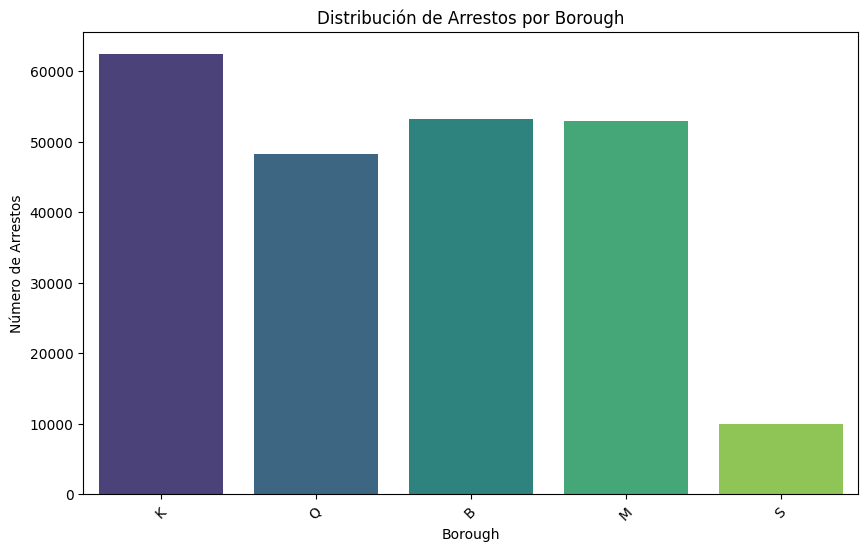

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


arrests_by_boro = df.groupBy("ARREST_BORO").count().toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x='ARREST_BORO', y='count', data=arrests_by_boro, palette='viridis')
plt.title('Distribución de Arrestos por Borough')
plt.xlabel('Borough')
plt.ylabel('Número de Arrestos')
plt.xticks(rotation=45)
display()  


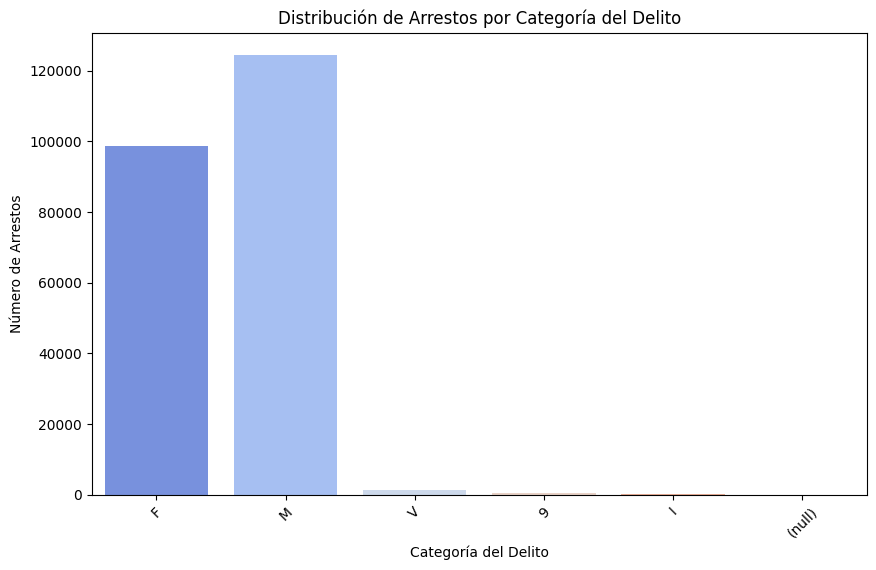

In [ ]:

arrests_by_law_cat = df.groupBy("LAW_CAT_CD").count().toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x='LAW_CAT_CD', y='count', data=arrests_by_law_cat, palette='coolwarm')
plt.title('Distribución de Arrestos por Categoría del Delito')
plt.xlabel('Categoría del Delito')
plt.ylabel('Número de Arrestos')
plt.xticks(rotation=45)
display()  

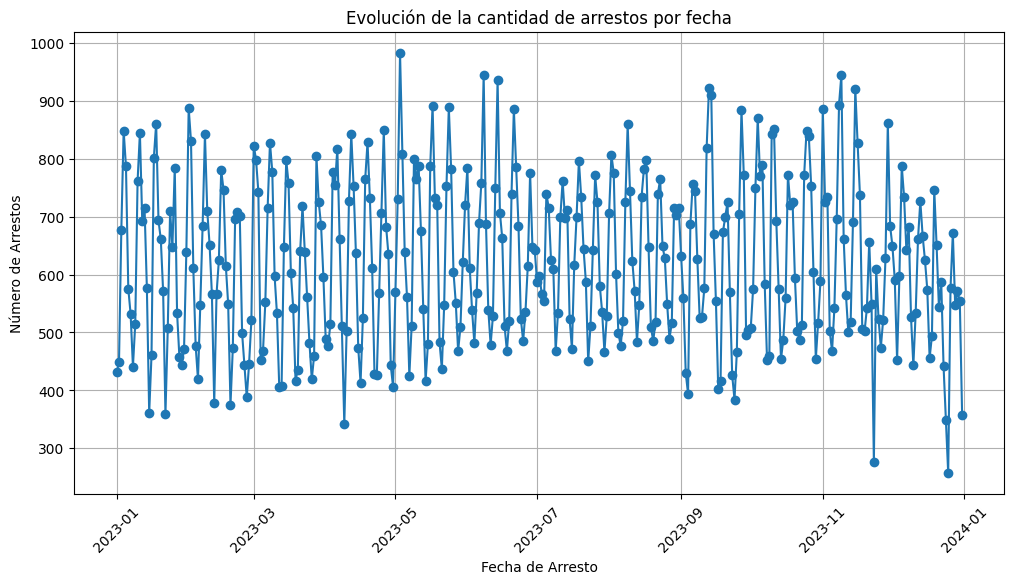

In [ ]:
arrests_by_date = df.groupBy("ARREST_DATE").count().orderBy("ARREST_DATE")
arrests_by_date_pd = arrests_by_date.toPandas()
plt.figure(figsize=(12, 6))
plt.plot(arrests_by_date_pd["ARREST_DATE"], arrests_by_date_pd["count"], marker='o', linestyle='-')
plt.title('Evolución de la cantidad de arrestos por fecha')
plt.xlabel('Fecha de Arresto')
plt.ylabel('Número de Arrestos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

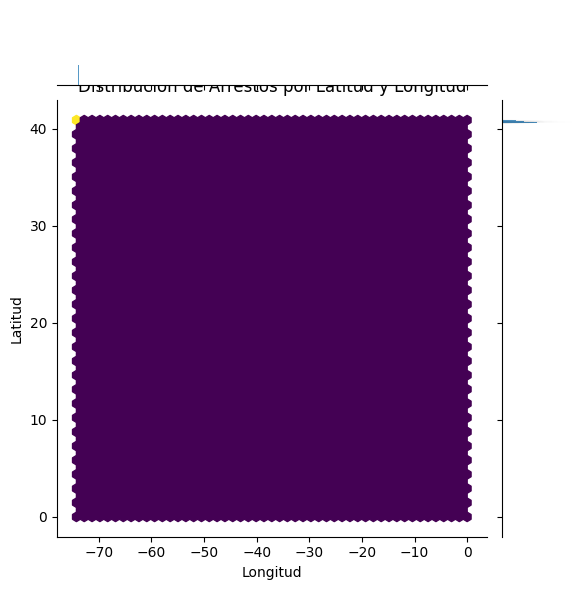

In [ ]:

plt.figure(figsize=(10, 8))
sns.jointplot(x='Longitude', y='Latitude', data=df.toPandas(), kind='hex', cmap='viridis')
plt.title('Distribución de Arrestos por Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()




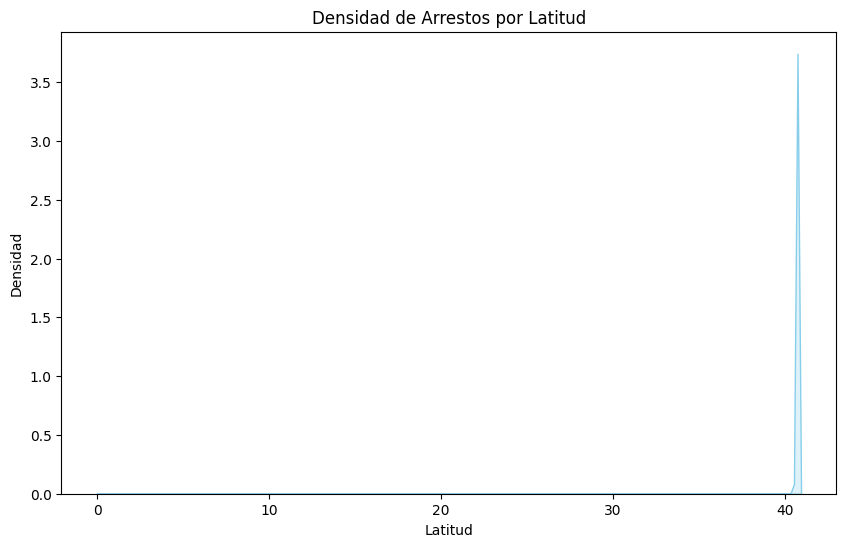

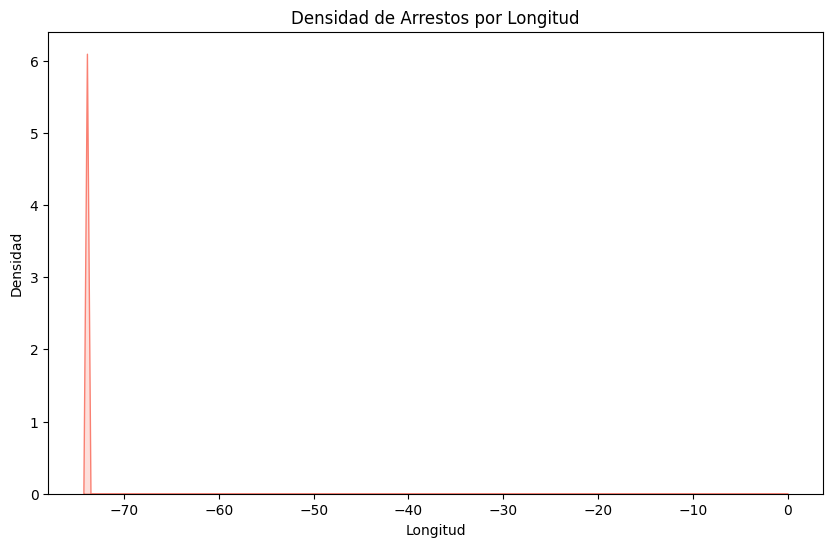

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.select("Latitude").toPandas()["Latitude"], shade=True, color="skyblue")
plt.title('Densidad de Arrestos por Latitud')
plt.xlabel('Latitud')
plt.ylabel('Densidad')
plt.show()
plt.figure(figsize=(10, 6))
sns.kdeplot(df.select("Longitude").toPandas()["Longitude"], shade=True, color="salmon")
plt.title('Densidad de Arrestos por Longitud')
plt.xlabel('Longitud')
plt.ylabel('Densidad')
plt.show()


In [ ]:
%pip install folium


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /databricks/python3/lib/python3.10/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-a5d463fc-053c-4e15-8b00-d93dad830f19
    Can't uninstall 'Jinja2'. No files were found to uninstall.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [ ]:
import folium
from folium.plugins import HeatMap
map_heat = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
sample_data = df.sample(fraction=0.1, seed=42).toPandas()
heat_data = [(row['Latitude'], row['Longitude']) for index, row in sample_data.iterrows()]
HeatMap(heat_data).add_to(map_heat)
map_heat



In [ ]:
from pyspark.sql import functions as F
column_name = 'VEHICLE_OCCUPANTS'

quartiles = df3.approxQuantile(column_name, [0.25, 0.75], 0.05)
Q1 = quartiles[0]
Q3 = quartiles[1]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df3.filter((df3[column_name] < lower_bound) | (df3[column_name] > upper_bound))
num_outliers = outliers.count()
print(f"Número de valores atípicos en la columna {column_name}: {num_outliers}")


Número de valores atípicos en la columna VEHICLE_OCCUPANTS: 875632


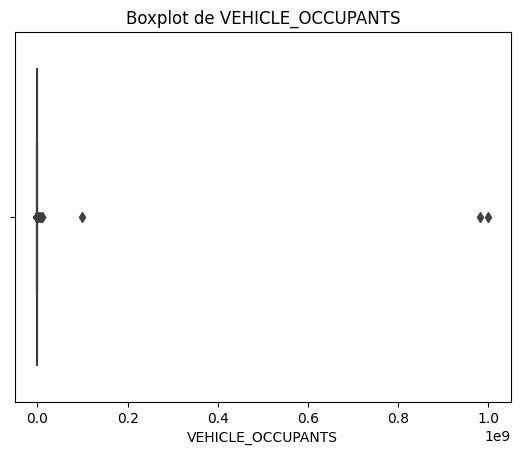

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_pandas = df3.toPandas()
sns.boxplot(x=df_pandas['VEHICLE_OCCUPANTS'])
plt.title('Boxplot de VEHICLE_OCCUPANTS')
plt.xlabel('VEHICLE_OCCUPANTS')
plt.show()


In [ ]:
display(df.select('VEHICLE_OCCUPANTS'))


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1206879817654859>, line 1
----> 1 display(df.select('VEHICLE_OCCUPANTS'))

NameError: name 'df' is not defined

In [ ]:

unique_ofns_desc = df.select("LAW_CAT_CD").distinct()
unique_ofns_desc.show(truncate=False)

+----------+
|LAW_CAT_CD|
+----------+
|F         |
|NULL      |
|M         |
|V         |
|9         |
|I         |
|(null)    |
+----------+



In [ ]:
from pyspark.sql.functions import col
missing_values = df.select([col(c).isNull().alias(c) for c in df.columns]).toPandas().sum()
print("Valores faltantes por columna:")
print(missing_values)



Valores faltantes por columna:
ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          2
PD_DESC                        0
KY_CD                         17
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1599
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64


In [ ]:
total_rows = df.count()
print("Cantidad total de datos en el DataFrame:", total_rows)


Cantidad total de datos en el DataFrame: 226872


In [ ]:
unique_ofns_desc = df.select("OFNS_DESC").distinct()
unique_ofns_desc.show(truncate=False)


+------------------------------+
|OFNS_DESC                     |
+------------------------------+
|OTHER TRAFFIC INFRACTION      |
|FELONY SEX CRIMES             |
|OTHER OFFENSES RELATED TO THEF|
|VEHICLE AND TRAFFIC LAWS      |
|KIDNAPPING & RELATED OFFENSES |
|OFF. AGNST PUB ORD SENSBLTY & |
|FELONY ASSAULT                |
|ALCOHOLIC BEVERAGE CONTROL LAW|
|CRIMINAL MISCHIEF & RELATED OF|
|THEFT-FRAUD                   |
|THEFT OF SERVICES             |
|MURDER & NON-NEGL. MANSLAUGHTE|
|JOSTLING                      |
|MISCELLANEOUS PENAL LAW       |
|ARSON                         |
|OFFENSES AGAINST THE PERSON   |
|GAMBLING                      |
|SEX CRIMES                    |
|CRIMINAL TRESPASS             |
|BURGLAR'S TOOLS               |
+------------------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col
missing_values = df3.select([col(c).isNull().alias(c) for c in df3.columns]).toPandas().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
UNIQUE_ID                            0
COLLISION_ID                         0
CRASH_DATE                           0
CRASH_TIME                           0
VEHICLE_ID                           0
STATE_REGISTRATION              299164
VEHICLE_TYPE                    232911
VEHICLE_MAKE                   1874569
VEHICLE_MODEL                  4098613
VEHICLE_YEAR                   1893963
TRAVEL_DIRECTION               1665649
VEHICLE_OCCUPANTS              1778286
DRIVER_SEX                     2209212
DRIVER_LICENSE_STATUS          2296864
DRIVER_LICENSE_JURISDICTION    2291944
PRE_CRASH                       918633
POINT_OF_IMPACT                1698458
VEHICLE_DAMAGE                 1722396
VEHICLE_DAMAGE_1               2587669
VEHICLE_DAMAGE_2               2974293
VEHICLE_DAMAGE_3               3249573
PUBLIC_PROPERTY_DAMAGE         1528858
PUBLIC_PROPERTY_DAMAGE_TYPE    4124336
CONTRIBUTING_FACTOR_1           146119
CONTRIBUTING_FACTOR_2          16

Tratamiento de valores faltantes

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, when

df = df.na.replace("(null)", None)



columns_to_drop = ['LAW_CAT_CD', 'PD_CD', 'KY_CD', 'PD_DESC']
df = df.drop(*columns_to_drop)

borough_mapping = {'B': 'Bronx', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'S': 'Staten Island'}
for abbrev, name in borough_mapping.items():
    df = df.withColumn("ARREST_BORO", when(col("ARREST_BORO") == abbrev, name).otherwise(col("ARREST_BORO")))


jurisdiction_mapping = {0: 'Patrol', 1: 'Transit', 2: 'Housing'}
for code, name in jurisdiction_mapping.items():
    df = df.withColumn("JURISDICTION_CODE", when(col("JURISDICTION_CODE") == code, name).otherwise(col("JURISDICTION_CODE")))


other_codes = [71, 69, 72, 11, 87, 14, 15, 7, 3, 4, 97, 73, 88, 85, 13, 6, 17, 79, 52, 74, 51, 12]
for code in other_codes:
    df = df.withColumn("JURISDICTION_CODE", when(col("JURISDICTION_CODE") == code, lit('Other')).otherwise(col("JURISDICTION_CODE")))


df = df.dropna()

In [ ]:
from pyspark.sql.functions import col
missing_values = df.select([col(c).isNull().alias(c) for c in df.columns]).toPandas().sum()
print("Valores faltantes por columna:")
print(missing_values)

In [ ]:
total_rows = df3.count()
print("Cantidad total de datos en el DataFrame:", total_rows)

Cantidad total de datos en el DataFrame: 4150041


In [ ]:
from pyspark.sql.functions import  count
null_counts_per_column = df3.agg(*[(1 - (count(c) / count("*"))).alias(c+"_nulls") for c in df3.columns])
column_with_most_nulls = max(null_counts_per_column.columns, key=lambda x: null_counts_per_column.select(x).first()[0])
print("La columna con más valores nulos en df3 es:", column_with_most_nulls)
print("Cantidad de valores nulos:", null_counts_per_column.select(column_with_most_nulls).first()[0])



In [ ]:
unique_ofns_desc = df3.select("CONTRIBUTING_FACTOR_1").distinct()
unique_ofns_desc.show(truncate=False)

+------------------------------------+
|CONTRIBUTING_FACTOR_1               |
+------------------------------------+
|Following Too Closely               |
|Traffic Control Disregarded         |
|Accelerator Defective               |
|Driverless/Runaway Vehicle          |
|Unsafe Speed                        |
|Oversized Vehicle                   |
|Passing or Lane Usage Improper      |
|Lane Marking Improper/Inadequate    |
|NULL                                |
|Aggressive Driving/Road Rage        |
|Other Vehicular                     |
|Driver Inexperience                 |
|Unspecified                         |
|Pavement Defective                  |
|Prescription Medication             |
|View Obstructed/Limited             |
|Lost Consciousness                  |
|Reaction to Other Uninvolved Vehicle|
|Reaction to Uninvolved Vehicle      |
|Fell Asleep                         |
+------------------------------------+
only showing top 20 rows



In [ ]:
print(df3['VEHICLE_OCCUPANTS'])

Column<'VEHICLE_OCCUPANTS'>


In [ ]:
from pyspark.sql import functions as F
min_value = df3.select(F.min('VEHICLE_OCCUPANTS')).collect()[0][0]
max_value = df3.select(F.max('VEHICLE_OCCUPANTS')).collect()[0][0]
display(min_value)
display(max_value)


0

999999999

In [ ]:
from pyspark.sql import functions as F
max_value = df3.select(F.max('VEHICLE_OCCUPANTS')).first()[0]
rows_with_max_value = df3.filter(df3['VEHICLE_OCCUPANTS'] == max_value)
display(rows_with_max_value)


UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,TRAVEL_DIRECTION,VEHICLE_OCCUPANTS,DRIVER_SEX,DRIVER_LICENSE_STATUS,DRIVER_LICENSE_JURISDICTION,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
17914214,3760446,2017-09-29,2024-03-13T16:06:00Z,49905ee7-bac5-4435-aeb3-bb05b9f2551f,null,null,null,null,null,East,999999999,null,null,null,null,null,null,null,null,null,N,null,null,null


In [ ]:
from pyspark.sql.functions import col, median
median_value = df3.stat.approxQuantile("VEHICLE_OCCUPANTS", [0.5], 0)[0]
df3 = df3.na.fill({"VEHICLE_OCCUPANTS": median_value})
df3.show()






+---------+------------+----------+-------------------+--------------------+------------------+--------------------+--------------+-------------+------------+----------------+-----------------+----------+---------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+------------------+----------------+----------------------+---------------------------+---------------------+---------------------+
|UNIQUE_ID|COLLISION_ID|CRASH_DATE|         CRASH_TIME|          VEHICLE_ID|STATE_REGISTRATION|        VEHICLE_TYPE|  VEHICLE_MAKE|VEHICLE_MODEL|VEHICLE_YEAR|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|DRIVER_SEX|DRIVER_LICENSE_STATUS|DRIVER_LICENSE_JURISDICTION|           PRE_CRASH|     POINT_OF_IMPACT|      VEHICLE_DAMAGE|    VEHICLE_DAMAGE_1|  VEHICLE_DAMAGE_2|VEHICLE_DAMAGE_3|PUBLIC_PROPERTY_DAMAGE|PUBLIC_PROPERTY_DAMAGE_TYPE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+---------+------------+----------+-------------------+-----

In [ ]:
print(median_value)

1.0


In [ ]:
unique_ofns_desc = df3.select("VEHICLE_OCCUPANTS").distinct()
unique_ofns_desc.show(truncate=False)

+-----------------+
|VEHICLE_OCCUPANTS|
+-----------------+
|26               |
|NULL             |
|1                |
|13               |
|6                |
|3                |
|54               |
|650              |
|5                |
|9                |
|4                |
|8                |
|7                |
|24               |
|62               |
|33               |
|11               |
|14               |
|2                |
|0                |
+-----------------+
only showing top 20 rows



In [ ]:

missing_values = df3.select([col(c).isNull().alias(c) for c in df3.columns]).toPandas().sum()

print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
UNIQUE_ID                            0
COLLISION_ID                         0
CRASH_DATE                           0
CRASH_TIME                           0
VEHICLE_ID                           0
STATE_REGISTRATION              299164
VEHICLE_TYPE                    232911
VEHICLE_MAKE                   1874569
VEHICLE_MODEL                  4098613
VEHICLE_YEAR                   1893963
TRAVEL_DIRECTION               1665649
VEHICLE_OCCUPANTS                    0
DRIVER_SEX                     2209212
DRIVER_LICENSE_STATUS          2296864
DRIVER_LICENSE_JURISDICTION    2291944
PRE_CRASH                       918633
POINT_OF_IMPACT                1698458
VEHICLE_DAMAGE                 1722396
VEHICLE_DAMAGE_1               2587669
VEHICLE_DAMAGE_2               2974293
VEHICLE_DAMAGE_3               3249573
PUBLIC_PROPERTY_DAMAGE         1528858
PUBLIC_PROPERTY_DAMAGE_TYPE    4124336
CONTRIBUTING_FACTOR_1           146119
CONTRIBUTING_FACTOR_2          16

In [ ]:
from pyspark.sql.functions import lit
from pyspark.sql import Window
mode_value_df = df3.groupBy("CONTRIBUTING_FACTOR_1").count()
windowSpec = Window.orderBy(F.desc("count"))
mode_value = mode_value_df.withColumn("rank", F.rank().over(windowSpec)) \
                          .filter(col("rank") == 1) \
                          .select("CONTRIBUTING_FACTOR_1") \
                          .collect()[0]["CONTRIBUTING_FACTOR_1"]

df3 = df3.na.fill({"CONTRIBUTING_FACTOR_1": mode_value})
df3.show()


+---------+------------+----------+-------------------+--------------------+------------------+--------------------+--------------+-------------+------------+----------------+-----------------+----------+---------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+------------------+----------------+----------------------+---------------------------+---------------------+---------------------+
|UNIQUE_ID|COLLISION_ID|CRASH_DATE|         CRASH_TIME|          VEHICLE_ID|STATE_REGISTRATION|        VEHICLE_TYPE|  VEHICLE_MAKE|VEHICLE_MODEL|VEHICLE_YEAR|TRAVEL_DIRECTION|VEHICLE_OCCUPANTS|DRIVER_SEX|DRIVER_LICENSE_STATUS|DRIVER_LICENSE_JURISDICTION|           PRE_CRASH|     POINT_OF_IMPACT|      VEHICLE_DAMAGE|    VEHICLE_DAMAGE_1|  VEHICLE_DAMAGE_2|VEHICLE_DAMAGE_3|PUBLIC_PROPERTY_DAMAGE|PUBLIC_PROPERTY_DAMAGE_TYPE|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+---------+------------+----------+-------------------+-----